In [1]:
import sys
import numpy as np
import os

sys.path.append('..')

from hydroml.model import BaryonModel
from hydroml.plot import plot_output, plot_output_compare, plot_error_of_time

from torch.utils.data import DataLoader

from torch import nn

import torch

In [2]:
batch_size = 1
epochs = 20
learning_rate = 1e-4

In [3]:
from hydroml.dataset import TrainDataset

net_Baryons_19_1 = np.fromfile('../datasets/training/3DAuAu200_minimumbias_BG16_tune17_netBaryon.dat', dtype=np.float32)
net_Protons_19_1 = np.fromfile('../datasets/training/3DAuAu200_minimumbias_BG16_tune17_netProton.dat', dtype=np.float32)

dataset = TrainDataset(net_Baryons_19_1, net_Protons_19_1, 141)

data_loader = DataLoader(
    dataset=dataset,
    batch_size=1,
    shuffle=True,
)

print(len(data_loader))

2048


In [4]:
model = BaryonModel()

In [5]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

In [6]:
loss_func = nn.MSELoss()

In [7]:
error = []
error_average = []
for epoch in range(epochs):
    for i, data in enumerate(data_loader):
        keys = data[0]
        values = data[1]

        output = model(keys)

        loss = loss_func(output, values)

        optimizer.zero_grad()

        # Average calc
        error.append(loss.detach().numpy())
        error_average.append(np.average(error))

        loss.backward()
        optimizer.step()
        
        # For illustration purposes
        # if i%100 == 0 and values.max() > 5.0:
        # #if values.max() > 5.0:
        #     print(i)
        #     plot_output_compare(dataset.eta, values, output.detach().numpy(), i)
    # break

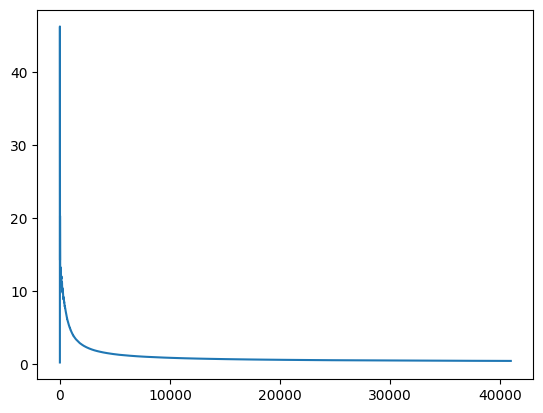

In [8]:
plot_error_of_time(error_average)

In [9]:
torch.save(model, "../models/baryon_model_200gev.pt")